In [113]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import sklearn

In [7]:
logins = 'logins.json'
logins = pd.DataFrame(json.load((open(logins))))
logins.login_time.isnull().sum()

0

No null values is always a good thing

In [8]:
file = 'ultimate_data_challenge.json'
file = pd.DataFrame(json.load((open(file))))
logins = 'logins.json'
logins = pd.DataFrame(json.load((open(logins))))
logins.login_time = pd.to_datetime(logins.login_time, format = '%Y-%m-%d %H:%M:%S')

In [9]:
# These 4 lines took like 2.5 hours to make
logins = 'logins.json'
logins = pd.DataFrame(json.load((open(logins))))
logins.login_time = pd.to_datetime(logins.login_time, format = '%Y-%m-%d %H:%M:%S')
logins['score']= 1
logins.set_index('login_time', inplace = True)
logins_15min_count = logins.resample('900S', how = 'sum')
logins_15min_count

C:\Users\12104\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  import sys


,score
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
...,...
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2


C:\Users\12104\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  """Entry point for launching an IPython kernel.


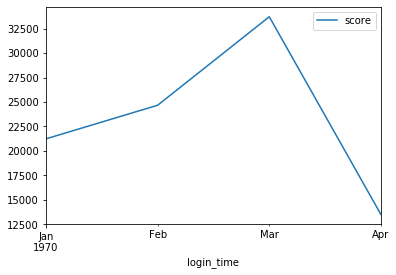

In [11]:
logins_M_count = logins.resample('M', how = 'sum')
logins_M_count.plot()
plt.show()

C:\Users\12104\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  """Entry point for launching an IPython kernel.


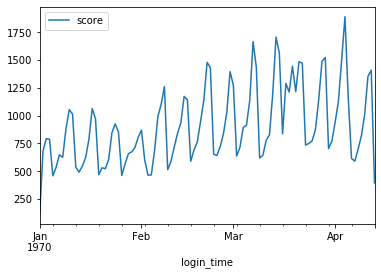

In [12]:
logins_d_count = logins.resample('d', how = 'sum')
logins_d_count.plot()
plt.show()

In [13]:
logins_1 = 'logins.json'
logins_1 = pd.DataFrame(json.load((open(logins_1))))
logins_1.login_time = pd.to_datetime(logins_1.login_time, format = '%Y-%m-%d %H:%M:%S')
logins_Min_count = logins_1.groupby(logins_1.login_time.dt.strftime('%H:%M')).count()
logins_Min_count

,login_time
login_time,
00:00,85
00:01,100
00:02,115
00:03,89
00:04,93
...,...
23:55,99
23:56,108
23:57,107


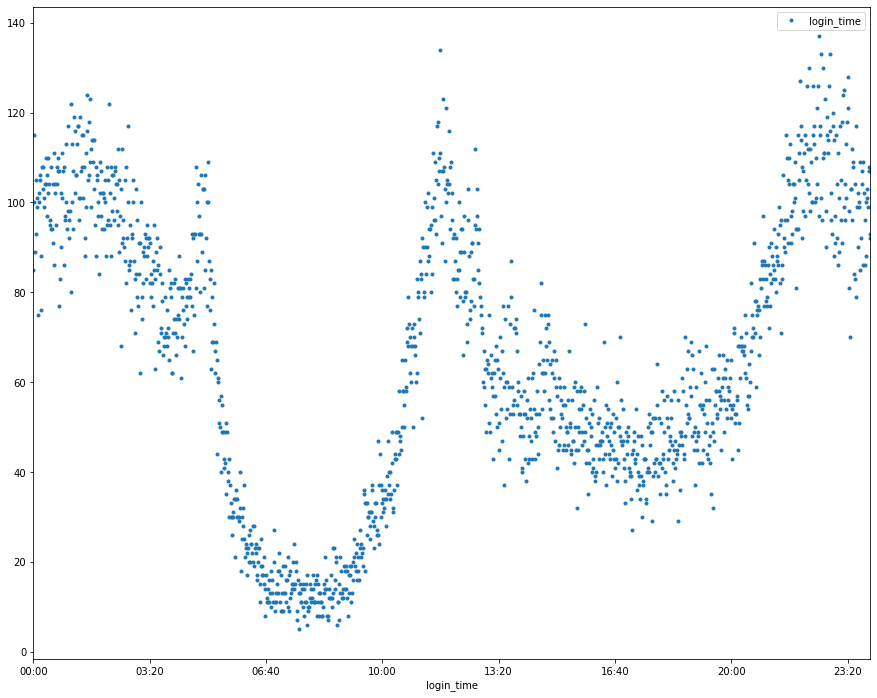

In [14]:
logins_Min_count.plot(linestyle = 'none', marker='.',figsize=(15, 12))

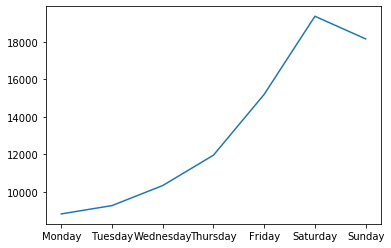

In [15]:
test = logins.reset_index()
test['week'] = test.login_time.dt.strftime('%A')
test_count = test.groupby(['week']).count().sort_index()
test_count['Order'] = [5,1,6,7,4,2,3]
test_count = test_count.sort_values(['Order'])
plt.plot(test_count.score)

## Part 2:

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate otham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two-way toll, between the two cities causes driver partners to thend to be exclusive to each city. The Ultimate managers of city operations for the two cities have propsoed an experiement to encourage driver partners to be available in both cities, by reimbursing all toll costs.

So actually, I am just supposed to design an A/B test for this part. There also seem to be a lot of creative liberties I can make due to the ambiguity in the way the question is asked.

1.) What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?  

The key measure of success for this experiement would be a signficant increase in the number of drivers that cross the bridge on both ends.

2.) Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

a.) How you would implement the experiment

b.) What statistical test(s) you will conduct to verify the significance of the observation

c.) how you would interpret the results and provide recommendations to the city operations team along with any caveats.

a.) The experiment would consist of two different data sets. The first data set would focus on the amount of people that commute between the two cities along with the date and time when they traveled. The second data set would contain the same information, but would consist of the dates and times after the money has been reimbursed. Then run tests on the data obtained to determine statistical significance. Comparisons should be done based on the day of the week for the sake of consistancy and holidays should be removed from the data.

b.) It would be imporant to test the p-value and alpha of our results.

With the p-value we compare it to the previously established significance level (alpha) and if it less than or equal to this significance level, then we reject the null hypothesis. This is how statistical significane is established.

With the alpha, we determine the value for statistical significance. In this case specifically, our null hypothesis would be that there is no change in the number of drivers traveling from city to city given that we returned everyones money.


c.) Assuming statistical significance has been established, there is also ROI to determine. Also, I just think the test is poorly executed. Getting a refund is great and all, but it is unexpected and only for people who were already using bridge. That means only the people that were using the bridge gain incentive to use it more often. There is a whole market that goes unincentivized which is the people who weren't using it before. And its a random refund. Will there be another? Who knows? Seems messy that theres no form of consistancy.

## Part 3:

As I understand it, and will want clarified, cities want to encourage drivers to go between cities. To do so, they are removing the toll to go between cities. How do you measure success of program?

In [48]:
file = 'ultimate_data_challenge.json'
file = pd.DataFrame(json.load((open(file))))

In [ ]:
# Signup Range: Starts 2014-01-01, Ends: 2014-01-31
# Last Trip Date Range: Starts 2014-01-01, Ends: 2014-07-01

In [51]:
retain = []
for i in range(len(file)):
    if file.trips_in_first_30_days[i] != 0:
        retain.append(1)
    else:
        retain.append(0)
file['retain'] = retain
file

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retain
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,1
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2,0
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0,1
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0,0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5,1


In [65]:
for column in file:
    print(column)
    print(sum(file[column].isna()))
    

city
0
trips_in_first_30_days
0
signup_date
0
avg_rating_of_driver
0
avg_surge
0
last_trip_date
0
phone
396
surge_pct
0
ultimate_black_user
0
weekday_pct
0
avg_dist
0
avg_rating_by_driver
0
retain
0


In [86]:
file.avg_rating_of_driver = file.avg_rating_of_driver.fillna(file.avg_rating_of_driver.mean())
file.avg_rating_by_driver = file.avg_rating_by_driver.fillna(file.avg_rating_by_driver.mean())
file = file.dropna()

In [87]:
file.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retain
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,1
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,1


In [99]:
model_df = file.drop(columns = ['signup_date','last_trip_date'])
model_df = pd.get_dummies(model_df, columns = ['phone','city'])
model_df.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retain,phone_Android,phone_iPhone,city_Astapor,city_King's Landing,city_Winterfell
0,4,4.7,1.10,15.4,True,46.2,3.67,5.0,1,0,1,0,1,0
1,0,5.0,1.00,0.0,False,50.0,8.26,5.0,0,1,0,1,0,0
2,3,4.3,1.00,0.0,False,100.0,0.77,5.0,1,0,1,1,0,0
3,9,4.6,1.14,20.0,True,80.0,2.36,4.9,1,0,1,0,1,0
4,14,4.4,1.19,11.8,False,82.4,3.13,4.9,1,1,0,0,0,1


In [143]:
X

,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,phone_Android,city_Astapor,city_King's Landing
0,4.700000,1.10,15.4,True,46.2,3.67,5.0,0,0,1
1,5.000000,1.00,0.0,False,50.0,8.26,5.0,1,1,0
2,4.300000,1.00,0.0,False,100.0,0.77,5.0,0,1,0
3,4.600000,1.14,20.0,True,80.0,2.36,4.9,0,0,1
4,4.400000,1.19,11.8,False,82.4,3.13,4.9,1,0,0
...,...,...,...,...,...,...,...,...,...,...
49995,5.000000,1.00,0.0,False,100.0,5.63,4.2,0,0,1
49996,4.601559,1.00,0.0,False,0.0,0.00,4.0,0,1,0
49997,5.000000,1.00,0.0,True,100.0,3.86,5.0,1,0,0
49998,3.000000,1.00,0.0,False,100.0,4.58,3.5,0,1,0


In [134]:
from sklearn import preprocessing
from sklearn import model_selection
# Dropping columns that represent repeated information and our outcome variable
X = model_df.drop(columns=['retain','city_Winterfell','phone_iPhone','trips_in_first_30_days'])
Y = model_df.retain
min_max_scaler = preprocessing.MinMaxScaler()
model_minmax = min_max_scaler.fit_transform(X)
scaled_X = pd.DataFrame(model_minmax)
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(scaled_X, Y, test_size = 0.3, random_state = 42)

I have the data split and normalized everything I needed to. As well, I dropped the extra columns that had only repeated information. Now its just a matter of training and classifying as well as figuring out feature importance. I'll fix the column name issue in a little. First I want to produce a sweet model.

In [140]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_fscore_support
clf = LogisticRegression(penalty = 'l2')
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
precision = precision_recall_fscore_support(Y_test, Y_pred)
print(accuracy_score(Y_test,Y_pred))
precision

0.6891546835102809


(array([0.40740741, 0.69018074]),
 array([0.00476603, 0.99688291]),
 array([0.00942184, 0.81565314]),
 array([ 4616, 10266], dtype=int64))

In [141]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
precision = precision_recall_fscore_support(Y_test, Y_pred)
print(accuracy_score(Y_test,Y_pred))
print(clf.feature_importances_)
precision

0.6969493347668324
[0.09074777 0.00830944 0.19732786 0.01050763 0.21128561 0.07022356
 0.33189785 0.01485006 0.0225786  0.04227163]


(array([0.57142857, 0.70353607]),
 array([0.09185442, 0.96902396]),
 array([0.15826801, 0.81520937]),
 array([ 4616, 10266], dtype=int64))

In [142]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
precision = precision_recall_fscore_support(Y_test, Y_pred)
print(accuracy_score(Y_test,Y_pred))
print(clf.feature_importances_)
precision

0.6550194866281414
[0.07880816 0.04677536 0.04488473 0.01864498 0.1012396  0.58936103
 0.07226004 0.01883584 0.01556904 0.01362121]


(array([0.42426901, 0.72387018]),
 array([0.31434142, 0.80820183]),
 array([0.36112494, 0.76371502]),
 array([ 4616, 10266], dtype=int64))

In [139]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
clf = AdaBoostClassifier()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
precision = precision_recall_fscore_support(Y_test, Y_pred)
print(accuracy_score(Y_test,Y_pred))
print(clf.feature_importances_)
precision

0.6926488375218385
[0.16 0.06 0.2  0.02 0.2  0.1  0.18 0.02 0.02 0.04]


(array([0.53125   , 0.70028149]),
 array([0.07733969, 0.96931619]),
 array([0.13502269, 0.81312306]),
 array([ 4616, 10266], dtype=int64))

There is not enough information to predict when someone will be active in the 6th month after they have joined so I instead created this model that predicts retention. 